In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
import math

from sklearn.metrics import accuracy_score, roc_auc_score

from xgboost import XGBClassifier
from tools.data_processing import *

# IMPORTING THE DATASET

In [130]:
l_index=0
mother_ID=["Ds","Dplus"]

In [131]:
MC_Dplus_sig_dict, MC_Ds_sig_dict, data_bkg_dict = load_datasets(l_index)

m_plus=MC_Dplus_sig_dict["Dplus_ConsD_M"].shape[0]
m_s=MC_Ds_sig_dict["Ds_ConsD_M"].shape[0]
n=data_bkg_dict["Ds_ConsD_M"].shape[0]

print('Bkg data amounts to {0} while signal MC amounts to {1} Ds and {2} Dplus samples'.format(n,m_s,m_plus))

Bkg data amounts to 11440 while signal MC amounts to 1250 Ds and 1150 Dplus samples


In [132]:
#Normalising the Chi2 vertex fits to the NDoF

MC_Ds_sig_dict["Ds_ENDVERTEX_CHI2"]=MC_Ds_sig_dict["Ds_ENDVERTEX_CHI2"]/MC_Ds_sig_dict["Ds_ENDVERTEX_NDOF"]
MC_Ds_sig_dict["Ds_IPCHI2_OWNPV"]=MC_Ds_sig_dict["Ds_IPCHI2_OWNPV"]/MC_Ds_sig_dict["Ds_ENDVERTEX_NDOF"]

MC_Ds_sig_dict["Ds_FDCHI2_OWNPV"]=MC_Ds_sig_dict["Ds_FDCHI2_OWNPV"]/MC_Ds_sig_dict["Ds_OWNPV_NDOF"]
MC_Ds_sig_dict["Ds_OWNPV_CHI2"]=MC_Ds_sig_dict["Ds_OWNPV_CHI2"]/MC_Ds_sig_dict["Ds_OWNPV_NDOF"]

del MC_Ds_sig_dict["Ds_OWNPV_NDOF"]
del MC_Ds_sig_dict["Ds_ENDVERTEX_NDOF"]
#del MC_sig_dict["Ds_M"]

MC_Dplus_sig_dict["Dplus_ENDVERTEX_CHI2"]=MC_Dplus_sig_dict["Dplus_ENDVERTEX_CHI2"]/MC_Dplus_sig_dict["Dplus_ENDVERTEX_NDOF"]
MC_Dplus_sig_dict["Dplus_IPCHI2_OWNPV"]=MC_Dplus_sig_dict["Dplus_IPCHI2_OWNPV"]/MC_Dplus_sig_dict["Dplus_ENDVERTEX_NDOF"]

MC_Dplus_sig_dict["Dplus_FDCHI2_OWNPV"]=MC_Dplus_sig_dict["Dplus_FDCHI2_OWNPV"]/MC_Dplus_sig_dict["Dplus_OWNPV_NDOF"]
MC_Dplus_sig_dict["Dplus_OWNPV_CHI2"]=MC_Dplus_sig_dict["Dplus_OWNPV_CHI2"]/MC_Dplus_sig_dict["Dplus_OWNPV_NDOF"]

del MC_Dplus_sig_dict["Dplus_OWNPV_NDOF"]
del MC_Dplus_sig_dict["Dplus_ENDVERTEX_NDOF"]

data_bkg_dict["Ds_ENDVERTEX_CHI2"]=data_bkg_dict["Ds_ENDVERTEX_CHI2"]/data_bkg_dict["Ds_ENDVERTEX_NDOF"]
data_bkg_dict["Ds_IPCHI2_OWNPV"]=data_bkg_dict["Ds_IPCHI2_OWNPV"]/data_bkg_dict["Ds_ENDVERTEX_NDOF"]

data_bkg_dict["Ds_OWNPV_CHI2"]=data_bkg_dict["Ds_OWNPV_CHI2"]/data_bkg_dict["Ds_OWNPV_NDOF"]
data_bkg_dict["Ds_FDCHI2_OWNPV"]=data_bkg_dict["Ds_FDCHI2_OWNPV"]/data_bkg_dict["Ds_OWNPV_NDOF"]

del data_bkg_dict["Ds_OWNPV_NDOF"]
del data_bkg_dict["Ds_ENDVERTEX_NDOF"]

data_bkg_dict["phi_ENDVERTEX_CHI2"]=data_bkg_dict["phi_ENDVERTEX_CHI2"]/data_bkg_dict["phi_ENDVERTEX_NDOF"]
#data_bkg_dict["phi_OWNPV_CHI2"]=data_bkg_dict["phi_OWNPV_CHI2"]/data_bkg_dict["phi_OWNPV_NDOF"]
data_bkg_dict["phi_IPCHI2_OWNPV"]=data_bkg_dict["phi_IPCHI2_OWNPV"]/data_bkg_dict["phi_ENDVERTEX_NDOF"]

#del data_bkg_dict["phi_OWNPV_NDOF"]
del data_bkg_dict["phi_ENDVERTEX_NDOF"]
del MC_Ds_sig_dict["phi_M"]
del MC_Dplus_sig_dict["phi_M"]

In [133]:
#Number of input features

dim=len(['cos_thetal']+return_branches_BDT(mother_index=1, l_index=l_index, meson_index=0))

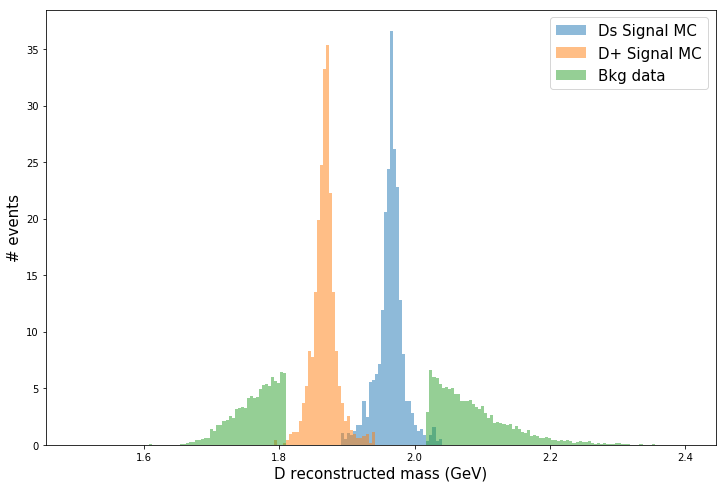

In [134]:
#Convert data dictionaries to arrays for NN
features=features=['cos_thetal']+return_branches_BDT(mother_index=0, l_index=l_index, meson_index=0)
MC_Ds_sig = extract_array(MC_Ds_sig_dict, features, dim, m_s)

features=features=['cos_thetal']+return_branches_BDT(mother_index=1, l_index=l_index, meson_index=0)
MC_Dplus_sig = extract_array(MC_Dplus_sig_dict, features, dim, m_plus)

features=features=['cos_thetal']+return_branches_BDT(mother_index=0, l_index=l_index, meson_index=0)
data_bkg = extract_array(data_bkg_dict, features, dim, n)

plt.hist(MC_Ds_sig[:,dim-1]/1000,alpha=0.5, label='Ds Signal MC',range=(1.5,2.4),density=True, bins=200);
plt.hist(MC_Dplus_sig[:,dim-1]/1000,alpha=0.5, label='D+ Signal MC', range=(1.5,2.4),density=True, bins=200);
plt.hist(data_bkg[:,dim-1]/1000,alpha=0.5, label='Bkg data',range=(1.5,2.4),density=True, bins=200);
plt.ylabel('# events', fontsize=15)
plt.xlabel('D reconstructed mass (GeV)', fontsize=15)
plt.legend(fontsize=15)
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.savefig('/home/hep/davide/Rphipi/mu/bdt_train.png', format='png', dpi=100)
#Cut on Ds Mass



In [135]:
#Cuts on mass

#data_bkg_cut=data_bkg[np.where(data_bkg[:,dim-1]<1930)]


In [136]:
#Add 0/1 label for bkg/sig

MC_Dplus_sig_labelled=add_labels(MC_Dplus_sig,signal=True)
MC_Ds_sig_labelled=add_labels(MC_Ds_sig,signal=True)
data_bkg_labelled=add_labels(data_bkg,signal=False)

#Merge MC sig and data bkg, shuffle it

data=np.concatenate((data_bkg_labelled,MC_Dplus_sig_labelled), axis =0)
data=np.concatenate((data,MC_Ds_sig_labelled), axis =0)
np.random.seed(1)
np.random.shuffle(data)

#get train size
train_size=data.shape[0]

In [137]:
#Strip away the label column and convert it to a one-hot encoding

X=data[:,0:dim]
Y_labels=data[:,dim].astype(int)
Y_labels=Y_labels.reshape(train_size,1)
Y_labels_hot = to_one_hot(Y_labels)
Y_labels=Y_labels_hot


In [253]:
#Divide the dataset k "equi populated" sets
test=1
k=10 #number of subsets
i=0#number of subset that is train set

X_train, Y_train, X_test, Y_test, X_dict, Y_dict = k_subsets(i, k, X, Y_labels)

In [254]:
X_mean=X_train.mean(axis=0)
X_train_1=X_train-X_mean
X_std=X_train_1.std(axis=0)
X_train_2=X_train_1/X_std



X_mean=X_test.mean(axis=0)
X_test_1=X_test-X_mean
X_std=X_test_1.std(axis=0)
X_test_2=X_test_1/X_std


In [255]:
X_train_2.shape

(12456, 14)

# SETTING UP THE XGBOOST

In [256]:
PATH=l_flv[l_index]+'/BDTs/test_'+str(test)

if not os.path.exists(PATH):
    os.mkdir(PATH)

if not os.path.exists(PATH+'/variables_used.pickle'):
    with open(PATH+'/variables_used.pickle', 'wb') as handle:  
        pickle.dump(return_branches_BDT(mother_index=0, l_index=l_index, meson_index=0), handle, protocol=2)

PATH=l_flv[l_index]+'/BDTs/test_'+str(test)+'/XG_'+str(i)

if not os.path.exists(PATH):
    os.mkdir(PATH)

In [257]:
model = XGBClassifier()
model.fit(X_train_2, Y_train[:,1])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [258]:
output_XG = model.predict_proba(X_test_2)

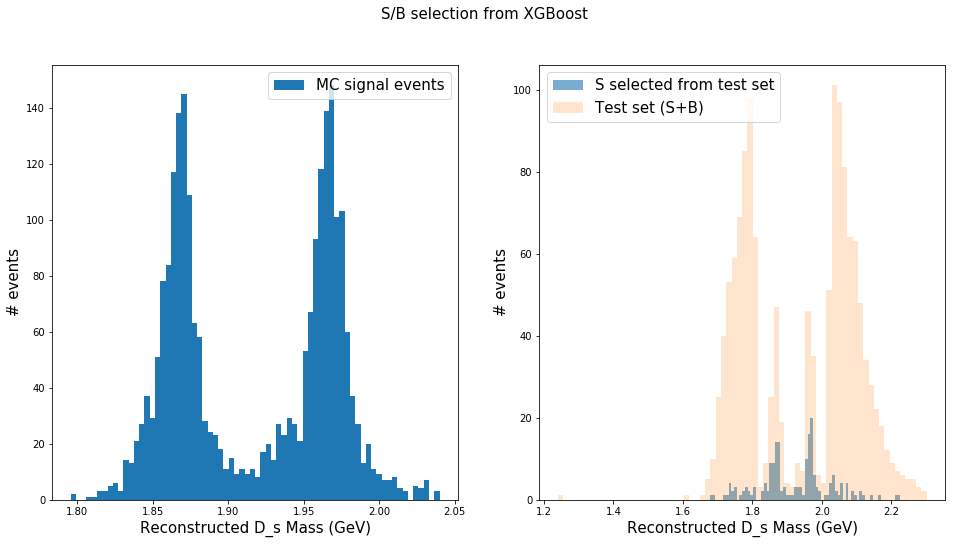

In [259]:
plt.suptitle('S/B selection from XGBoost', fontsize='15')
Ds_mass_MC =[MC_Ds_sig_dict["Ds_ConsD_M"][j][0]/1000 for j in range(m_s)]
Dplus_mass_MC =[MC_Dplus_sig_dict["Dplus_ConsD_M"][j][0]/1000 for j in range(m_plus)]
XG_selected = X_dict[i][np.argmax(output_XG,1).astype(np.bool)]
Ds_mass_sel_XG = XG_selected[:,dim-1]/1000
Ds_mass_train_XG =X_dict[i][:,dim-1:dim]/1000

plt.subplot(1,2,1)
plt.hist(Ds_mass_MC+Dplus_mass_MC,bins=70, label='MC signal events');
plt.legend(fontsize='15')
plt.ylabel('# events', fontsize=15)
plt.xlabel('Reconstructed D_s Mass (GeV)', fontsize=15)
plt.subplot(1,2,2)

plt.hist(Ds_mass_sel_XG,alpha=0.6,bins=70, label='S selected from test set');
plt.hist(Ds_mass_train_XG,alpha=0.2,bins=70, label='Test set (S+B)');
plt.legend(fontsize='15')
plt.ylabel('# events', fontsize=15)
plt.xlabel('Reconstructed D_s Mass (GeV)', fontsize=15)
fig=plt.gcf();
fig.set_size_inches(16,8)
plt.savefig('/home/hep/davide/Rphipi/'+PATH+'/D_s_XG.png', format='png', dpi=100)

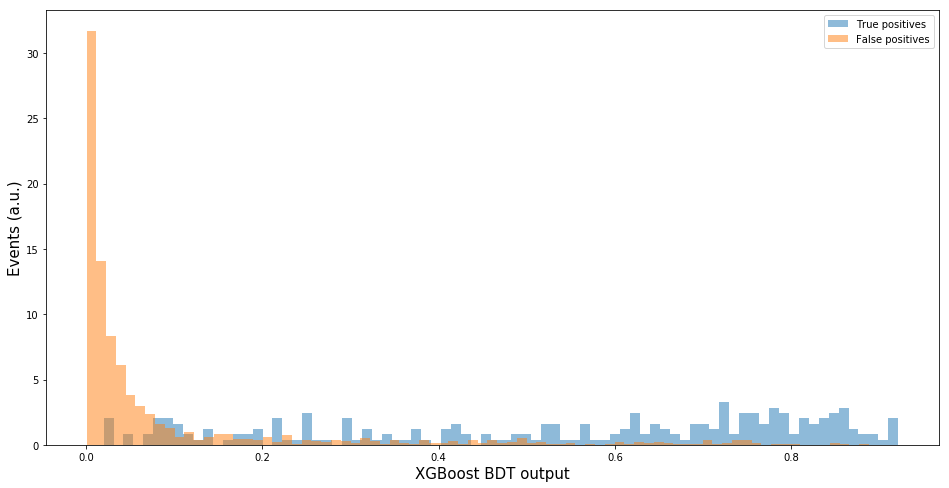

In [260]:
true_positives_XG=output_XG[:,1][np.where(Y_test[:,1]==1)]
false_positives_XG=output_XG[:,1][np.where(Y_test[:,0]==1)]
plt.hist(true_positives_XG,alpha=0.5,bins=80,density=True,label="True positives");
plt.hist(false_positives_XG,alpha=0.5,bins=80,density=True, label="False positives");
plt.legend()
plt.xlabel("XGBoost BDT output", fontsize='15')
plt.ylabel("Events (a.u.)", fontsize='15')
fig=plt.gcf()
fig.set_size_inches(16,8)
plt.savefig('/home/hep/davide/Rphipi/'+PATH+'/tp_vs_fp_XG.png', format='png', dpi=100)

In [261]:
np.float(np.where(true_positives_XG>0.5)[0].shape[0])/np.float(true_positives_XG.shape[0])

0.6027397260273972

pAUC from XG Boost 0.930797420973


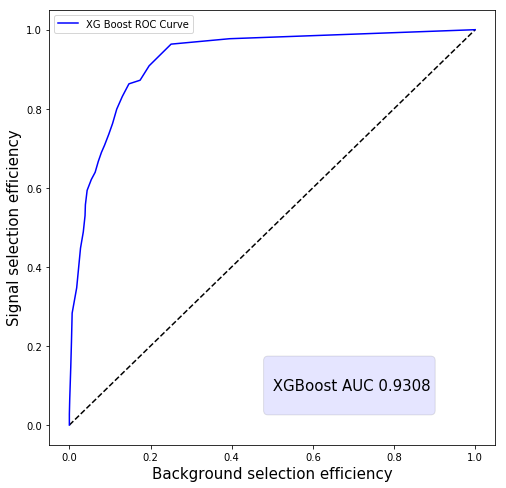

In [262]:
threshold_range=np.linspace(0.0,1.,num=30)
sig_eps_vals_XG=[sel_eff(true_positives_XG,threshold_range[k]) for k in range(len(threshold_range))]
bkg_eps_vals_XG=[sel_eff(false_positives_XG,threshold_range[k]) for k in range(len(threshold_range))]


plt.plot(threshold_range,threshold_range, 'black', linestyle='dashed')
plt.plot(bkg_eps_vals_XG,sig_eps_vals_XG,'b',label="XG Boost ROC Curve")
plt.xlabel("Background selection efficiency", fontsize='15')
plt.ylabel("Signal selection efficiency", fontsize='15')
pAUC_XG=roc_auc_score(Y_test,output_XG)
plt.text(0.69,0.1,"\n XGBoost AUC {0:.4g}\n".format(pAUC_XG), bbox=dict(boxstyle="round", facecolor='blue', alpha=0.10), horizontalalignment='center', verticalalignment='center',fontsize='15')
plt.legend()
fig=plt.gcf()
fig.set_size_inches(8,8)

print("pAUC from XG Boost {0}".format(pAUC_XG))
plt.savefig('/home/hep/davide/Rphipi/'+l_flv[l_index]+'/BDTs/test_'+str(test)+'/roc_comparison_'+str(i)+'.png', format='png', dpi=100)

In [263]:
# save XGBOOST model to file
pickle.dump(model, open(PATH+"/XG_"+str(i)+"_.pickle.dat", "wb"), protocol=2)

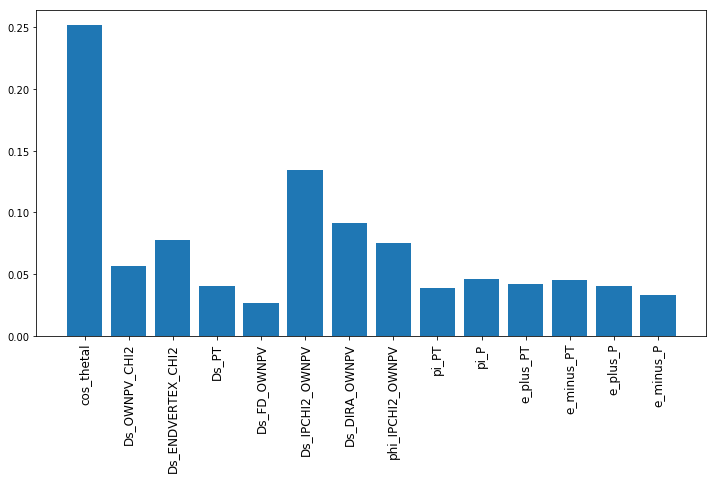

In [264]:
plt.bar(np.arange(dim-1),model.feature_importances_)
plt.xticks(np.arange(dim-1), features[:-1], rotation=90, fontsize=12);
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.savefig('/home/hep/davide/Rphipi/'+l_flv[l_index]+'/BDTs/test_'+str(test)+'/significant_features_'+str(i)+'.png', format='png', dpi=100)

In [204]:
len(features)

15

In [284]:
PATH

'mu/BDTs/test_1/XG_9'